In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [29]:
# Load the data
df = pd.read_csv('results2.csv')

In [30]:
df.head()

,Label,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,hand_angle,left_hip_angle,right_hip_angle,neck_angle_uk,left_wrist_angle_bk,right_wrist_angle_bk,Id
0,ArdhaChandrasana,172.499604,187.485559,94.156304,106.508059,179.450259,187.021573,180.216741,177.526001,283.022912,287.342114,137.311465,322.806814,ArdhaChandrasana_1.jpg
1,ArdhaChandrasana,178.720036,196.708758,117.208177,72.176494,169.467784,182.077942,165.554012,68.388314,173.162648,326.787168,31.961928,224.163495,ArdhaChandrasana_2.jpg
2,ArdhaChandrasana,175.662074,183.517221,77.658463,111.881986,177.916392,190.891525,176.241771,187.512459,289.599904,293.278186,135.479853,329.148014,ArdhaChandrasana_3.jpg
3,ArdhaChandrasana,164.412187,197.509685,71.334097,112.253839,182.937609,189.311057,172.927653,170.500492,288.749796,306.007130,119.722993,323.788437,ArdhaChandrasana_4.png
4,ArdhaChandrasana,162.916913,187.253195,79.835830,107.950771,177.371875,190.002463,175.236358,167.041821,284.348526,292.988717,123.161095,323.813540,ArdhaChandrasana_5.jpeg


In [31]:
# Prepare the data
X = df.drop(['Label', 'Id'], axis=1)  # Features
y = df['Label']  # Target

In [32]:
# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [34]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Define the model
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=60,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1409 - loss: 2.1065 - val_accuracy: 0.2436 - val_loss: 1.9218
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1837 - loss: 1.9291 - val_accuracy: 0.3974 - val_loss: 1.7316
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3080 - loss: 1.7823 - val_accuracy: 0.4487 - val_loss: 1.5507
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4827 - loss: 1.6334 - val_accuracy: 0.4744 - val_loss: 1.3719
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4804 - loss: 1.4306 - val_accuracy: 0.5897 - val_loss: 1.2097
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6162 - loss: 1.3000 - val_accuracy: 0.6410 - val_loss: 1.0692
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5766 - loss: 1.2083 - val_accuracy: 0.7564 - val_loss: 0.9532
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6940 - loss: 1.0253 - val_accuracy: 0.8590 - val_loss

In [51]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9691


In [38]:
# Function to predict yoga pose
def predict_yoga_pose(angles):
    # Ensure the input is a 2D array
    input_data = np.array(angles).reshape(1, -1)

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)

    # Get the predicted class
    predicted_class = le.inverse_transform([np.argmax(prediction)])

    return predicted_class[0]

In [50]:
# Example usage
example_angles = [164.4121872386372, 197.50968542820553, 71.33409656762798, 112.2538390644768, 182.9376087853103, 189.31105655851064, 172.92765300627426, 170.5004921969057, 288.74979607242494, 306.0071299118511, 119.72299337334601, 323.7884367443894]  # Replace with actual angle values
predicted_pose = predict_yoga_pose(example_angles)
print(f"Predicted yoga pose: {predicted_pose}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted yoga pose: ArdhaChandrasana


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Save the model
model.save('yoga_pose_model.h5')
# Save the StandardScaler
joblib.dump(scaler, 'yoga_pose_scaler.joblib')
# Save the LabelEncoder
joblib.dump(le, 'yoga_pose_label_encoder.joblib')

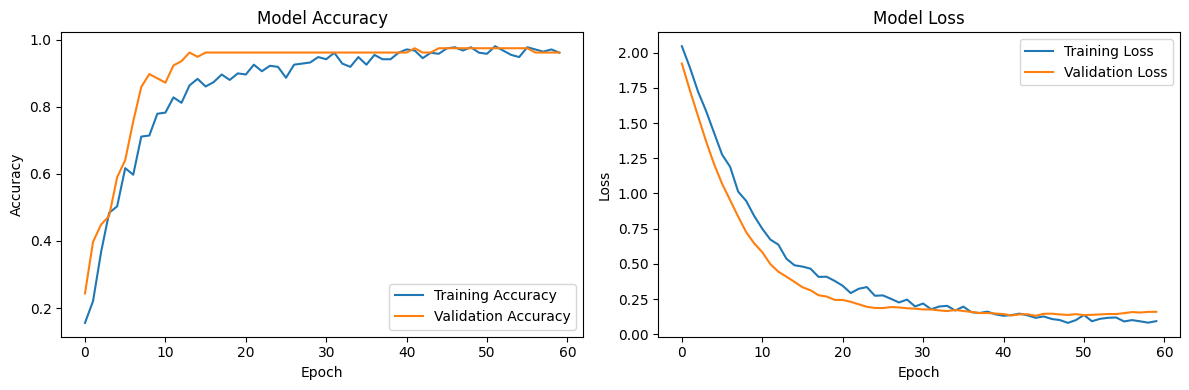

In [49]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()